<a href="https://colab.research.google.com/github/helgadenes/Bootcamp2025/blob/main/CursoB_Semana2/Spectral_line_decomposition/spectral_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fitting spectral lines (advanced)

In this exercise we will be fitting Gaussian functions to spectral lines of the transition of the Hydrogen atom. This is a forbidden transition that occurs as a result of its hyperfine structure.

Let us assume the spin of the p+ is down, then the
 transition occurs when the spin of the electron flips from up to down (i.e. when going from anti-parallel to parallel). The spin up configuration has a slightly higher energy than the spin down because the magnetic dipole moments are parallel, so when it flips it releases a low-energy photon and goes into the spin down configuration, which has lower energy as the the magnetic dipole moments are anti-parallel.

And some nice extra details from Wikipedia:

"This transition is highly forbidden with an extremely small transition rate of
 and a mean lifetime of the excited state of around 10 million years. A spontaneous occurrence of the transition is unlikely to be seen in a laboratory on Earth, but it can be artificially induced using a hydrogen maser. It is commonly observed in astronomical settings such as hydrogen clouds in our galaxy and others. Because of its long lifetime, the line has an extremely small natural width, so most broadening is due to Doppler shifts caused by bulk motion or nonzero temperature of the emitting regions."

The transition. At 21 cm, 1.4 GHz.

The data are taken from the GASS survey. All GASS data is available from a public data server: https://www.astro.uni-bonn.de/hisurvey/gass/index.php.

This survey uses the Parkes telescopes in Australia.

If you are interested in more information, I am leaving the links below:

Parkes: https://www.parkes.atnf.csiro.au/

Datafile: https://github.com/wbandabarragan/computational-physics-1/blob/main/sample-data/104444.9-264831_gass_spectrum.txt

In [1]:
# Import usual libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.optimize as opt
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.modeling.models import Gaussian1D

# this is to access files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading in the data from a fits file

In [2]:
# location of the data files
directory = '/content/drive/My Drive/Colab_notebooks/'

file = directory+'/gass_161_27_1752534664.fits'
hdul = fits.open(file)

# Fits files have a header part, which contains the metadata of the file, in this case the details of the observation
h = hdul[0].header

# and a data part, which is esentially an N dimensional matrix with numbers
d = hdul[0].data

In [3]:
h[:30]

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                   25 / length of data axis 1                          
NAXIS2  =                   25 / length of data axis 2                          
NAXIS3  =                 1201 / length of data axis 3                          
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'RA---CAR'           / axis type                                      
CRVAL1  =   1.611833333333E+02 / longitude                                      
CRPIX1  =   1.300000000000E+01 / ref pixel                                      
CDELT1  =  -8.963394165039E-02 / longitude increment                            
CROTA1  =   0.000000000000E+

In [4]:
d.shape[0]

1201

## Let's have a look at the data

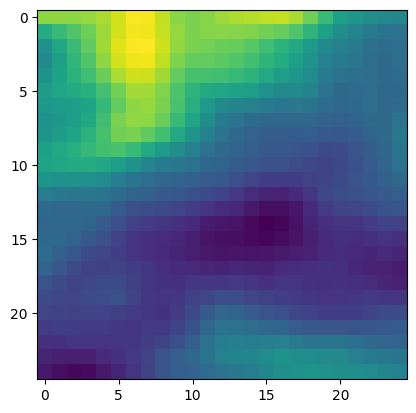

In [23]:
plt.imshow(d[600,:,:])

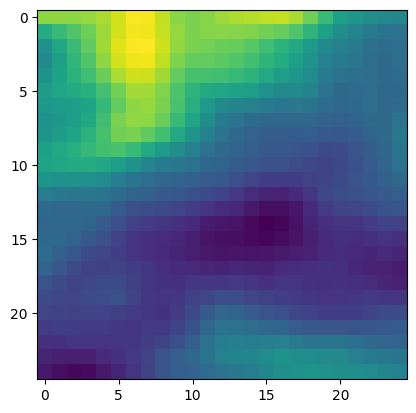

In [24]:
plt.imshow(d[600,:,:])

In [5]:
# define the velocity axis based on the header
vel = (np.arange(d.shape[0])*h['CDELT3'] + h['CRVAL3'])/1000
Tb = d[:,10,10]

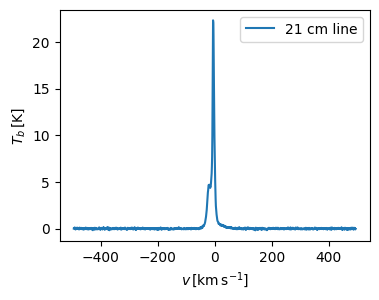

In [6]:
# Plotting: figure environment

plt.figure(figsize=(4,3))

plt.plot(vel, Tb, label = "21 cm line")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.show()


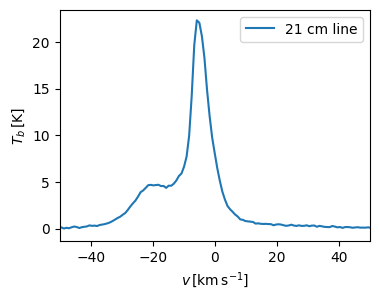

In [7]:
# Plotting: figure environment

plt.figure(figsize=(4,3))

plt.plot(vel, Tb, label = "21 cm line")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

## Fitting a 1D Gaussian model

In [8]:
# Function for the Gaussian

def one_gaussian(x, a, b, c):
    """
    This defnes a 1-Gaussian model for the regression.
    This may not be the best model because we see 2 components.
    Inputs: x-> velocity vector, a in the height of the Gaussian,
            b-> is the width, c -> displacement
    Output: y -> 1D 1-Gaussian model
    """

    # 1D Gaussian
    y = a*np.exp(-b*(x + c)**2)

    return y

In [9]:
# Regression with curve_fit

coef, cova = opt.curve_fit(one_gaussian, vel, Tb)

print("Best-fit values are:\n", coef)

print("The covariance matrix is:\n", cova)

Best-fit values are:
 [19.4988688   0.03199297  4.89988699]
The covariance matrix is:
 [[5.64889637e-02 1.23574472e-04 1.96820146e-10]
 [1.23574472e-04 8.10989386e-07 4.61358761e-13]
 [1.96820146e-10 4.61358761e-13 3.09625241e-03]]


/tmp/ipython-input-8-3295229245.py:13: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*(x + c)**2)


In [10]:
# Calculate uncertainties
unc_param = np.sqrt(np.diag(cova))

print("The associated uncertainties are:\n", unc_param)

The associated uncertainties are:
 [0.23767407 0.00090055 0.05564398]


In [11]:
# Evaluate our models using the best-fit params

h1_int_fit = one_gaussian(vel, *coef)

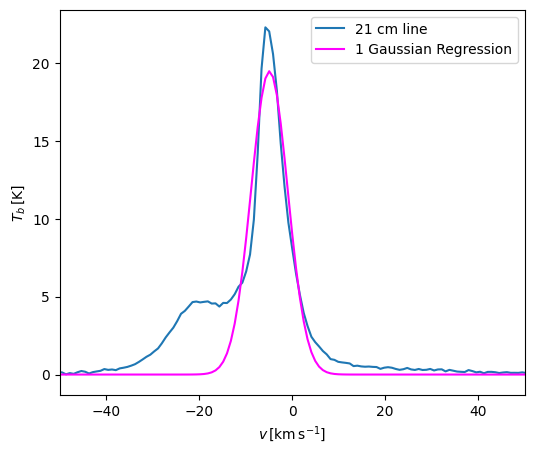

In [12]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(vel, Tb, label = "21 cm line")

# Regression
plt.plot(vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

## Fitting a 1D model with 2 Gaussian components

In [13]:
# Function for the Gaussian

def two_gaussian(x, a, b, c, d, e, f):
    """
    This defines a 2-Gaussian model for the regression.
    This may be a good model because we see 2 components.
    Inputs: x-> velocity vector, a,d are the heights of the
            Gaussians,
            b, e-> are the widths,
            c, f -> are the displacements
    Output: y -> 1D 2-Gaussian model
    """

    # 2D Gaussians
    y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2)

    return y

In [14]:
# Regression with curve_fit

coef2, cova2 = opt.curve_fit(two_gaussian, vel, Tb)

print("Best-fit values are:\n", coef2)

print("The covariance matrix is:\n", cova2)

Best-fit values are:
 [5.21791038e+00 3.10024658e-03 1.12541820e+01 1.74286301e+01
 7.93062224e-02 4.68956521e+00]
The covariance matrix is:
 [[ 3.44411065e-03  2.05649014e-06 -3.31957178e-03 -2.47403278e-03
   3.55554509e-05 -1.49426290e-04]
 [ 2.05649014e-06  3.39201525e-09 -1.13654027e-06 -1.09378472e-06
   1.28429213e-08 -2.09729457e-07]
 [-3.31957178e-03 -1.13654027e-06  1.92471716e-02  4.89849368e-03
  -6.58534182e-05 -2.23928878e-04]
 [-2.47403278e-03 -1.09378472e-06  4.89849368e-03  1.01011998e-02
   1.66475684e-05  3.77225338e-05]
 [ 3.55554509e-05  1.28429213e-08 -6.58534182e-05  1.66475684e-05
   1.32296163e-06 -4.97688448e-07]
 [-1.49426290e-04 -2.09729457e-07 -2.23928878e-04  3.77225338e-05
  -4.97688448e-07  2.38388042e-04]]


/tmp/ipython-input-13-227499923.py:15: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2)


In [15]:
# Calculate uncertainties
unc_param2 = np.sqrt(np.diag(cova2))

print("The associated uncertainties are:\n", unc_param2)

The associated uncertainties are:
 [5.86865457e-02 5.82410101e-05 1.38734176e-01 1.00504725e-01
 1.15020069e-03 1.54398200e-02]


In [16]:
# Evaluate our models using the best-fit params

h1_int_fit2 = two_gaussian(vel, *coef2)

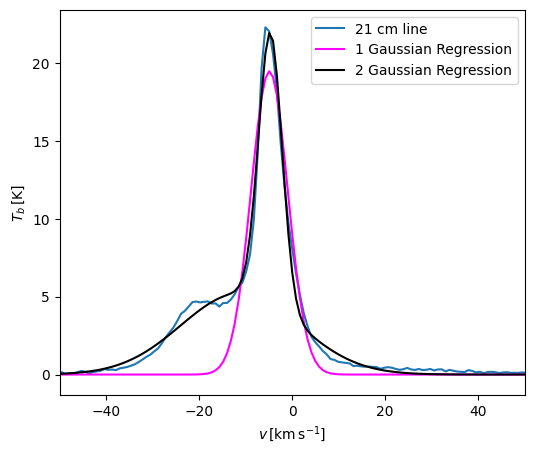

In [17]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(vel, Tb, label = "21 cm line")

# 1st attemp: Regression -> 1 Gaussian
plt.plot(vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")


# 2nd attemp: Regression -> 2 Gaussians
plt.plot(vel, h1_int_fit2, color = "black", label = "2 Gaussian Regression")


plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

In [18]:
# Evaluate each Gaussian

gaussian_1 = one_gaussian(vel, coef2[0], coef2[1], coef2[2])

gaussian_2 = one_gaussian(vel, coef2[3], coef2[4], coef2[5])

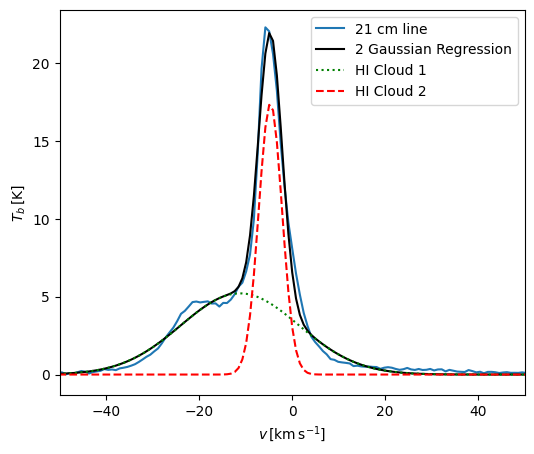

In [19]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(vel, Tb, label = "21 cm line")

# 1st attemp: Regression -> 1 Gaussian
#plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")


# 2nd attemp: Regression -> 2 Gaussians
plt.plot(vel, h1_int_fit2, color = "black", label = "2 Gaussian Regression")

# Gaussian 1
plt.plot(vel, gaussian_1, linestyle = ":", color = "green", label = "HI Cloud 1")

# Gaussian 2
plt.plot(vel, gaussian_2, linestyle = "--", color = "red", label = "HI Cloud 2")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()